In [38]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetBuilder
import matplotlib.pyplot as plt 

In [5]:
load_dotenv(override=True)
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

In [11]:
login(os.environ['HF_TOKEN'],add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [12]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", f"raw_meta_Appliances", split='full', trust_remote_code=True)

README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

meta_Appliances.jsonl:   0%|          | 0.00/285M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [14]:
len(dataset)

94327

In [18]:
sample = dataset[2]

In [56]:
sample

{'main_category': 'Tools & Home Improvement',
 'title': 'Clothes Dryer Drum Slide, General Electric, Hotpoint, WE1M333, WE1M504',
 'average_rating': 3.5,
 'rating_number': 18,
 'features': [],
 'description': ['Brand new dryer drum slide, replaces General Electric, Hotpoint, RCA, WE1M333, WE1M504.'],
 'price': 'None',
 'images': {'hi_res': ['https://m.media-amazon.com/images/I/51TIpnkrEpL._AC_SL1500_.jpg'],
  'large': ['https://m.media-amazon.com/images/I/21HQKcHPIkL._AC_.jpg'],
  'thumb': ['https://m.media-amazon.com/images/I/21HQKcHPIkL._AC_US75_.jpg'],
  'variant': ['MAIN']},
 'videos': {'title': [], 'url': [], 'user_id': []},
 'store': 'GE',
 'categories': ['Appliances', 'Parts & Accessories'],
 'details': '{"Manufacturer": "RPI", "Part Number": "WE1M333,", "Item Weight": "0.352 ounces", "Package Dimensions": "5.5 x 4.7 x 0.4 inches", "Item model number": "WE1M333,", "Is Discontinued By Manufacturer": "No", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Requi

In [22]:
print(sample['title'])
print(sample['description'])
print(sample['features'])
print(sample['details'])
print(sample['price'])


Clothes Dryer Drum Slide, General Electric, Hotpoint, WE1M333, WE1M504
['Brand new dryer drum slide, replaces General Electric, Hotpoint, RCA, WE1M333, WE1M504.']
[]
{"Manufacturer": "RPI", "Part Number": "WE1M333,", "Item Weight": "0.352 ounces", "Package Dimensions": "5.5 x 4.7 x 0.4 inches", "Item model number": "WE1M333,", "Is Discontinued By Manufacturer": "No", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Required?": "No", "Best Sellers Rank": {"Tools & Home Improvement": 1315213, "Parts & Accessories": 181194}, "Date First Available": "February 25, 2014"}
None


In [44]:
not_none_prices_data = [float(price) for price in dataset['price'] if price != 'None']
percentage_not_none = len(not_none_prices_data)/len(dataset) * 100
print(f"{percentage_not_none: .1f} of the dataset does not have None price")

 49.5 of the dataset does not have None price


In [47]:
content = [data['title'] + str(data['description']) + str(data['features']) +str (data['details']) + data['price'] for data in dataset if data['price'] != None]

In [49]:
lengths = [len(data['title'] + str(data['description']) + str(data['features']) +str (data['details']) + data['price']) for data in dataset if data['price'] != None]

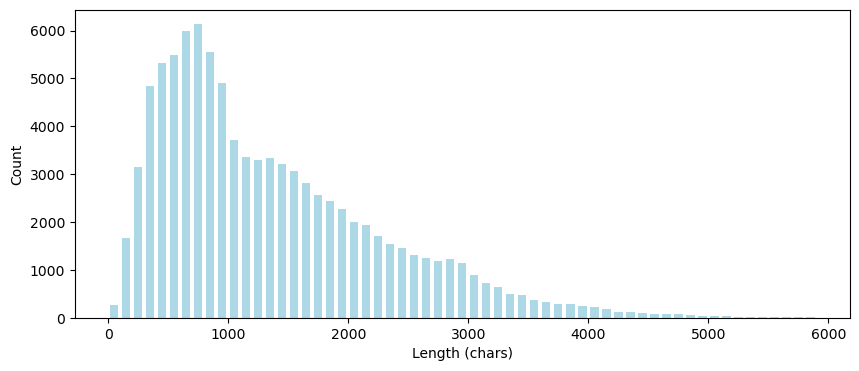

In [52]:
plt.figure(figsize=(10,4))
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.show()


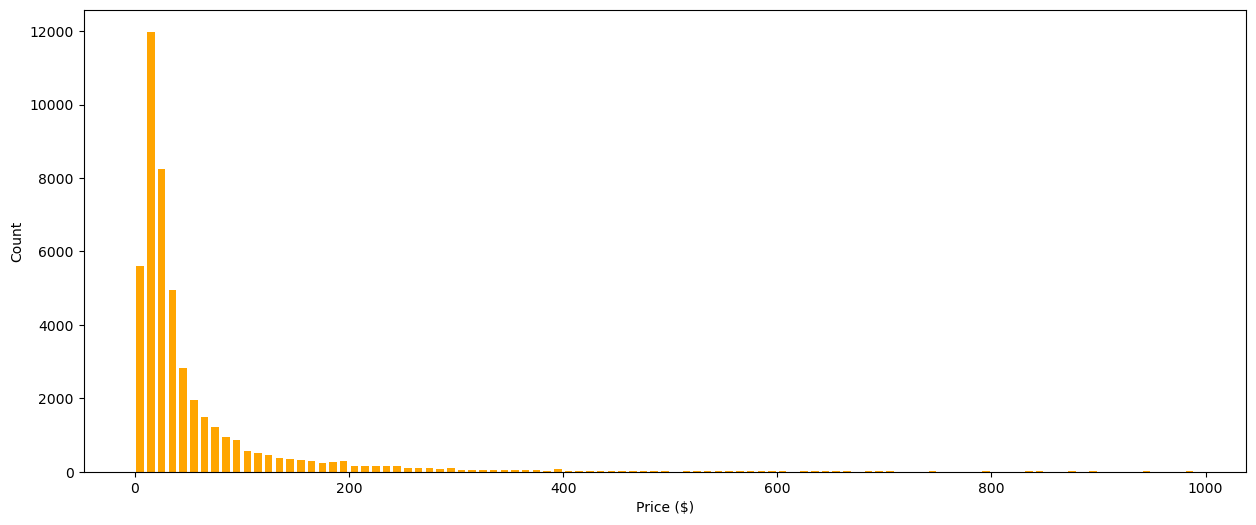

In [54]:
plt.figure(figsize=(15, 6))
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(not_none_prices_data, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()

In [55]:
from typing import Optional 
from transformers import AutoTokenizer
import re



BASE_MODEL = "meta-llama/Meta-Llama-3.1-8B"

MIN_TOKENS = 150
MAX_TOKENS = 160

MIN_CHARS = 300
CEILING_CHARS = MAX_TOKENS * 7

In [57]:
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL, true_remote_code=True)
PREFIX = "Price is $"
Question = "How does this costs to the nearest dollar?"
REMOVALS = ['"Batteries Included?": "No"', '"Batteries Included?": "Yes"', '"Batteries Required?": "No"', '"Batteries Required?": "Yes"', "By Manufacturer", "Item", "Date First", "Package", ":", "Number of", "Best Sellers", "Number", "Product "]



tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

In [ ]:
def scrub_details():
    for remove in REMOVALS:
        deatils = details.replace

In [ ]:
def parse(data):
    contents = 